In [1]:
from deepmol.loaders import CSVLoader
import pandas as pd
import numpy as np

# Load data from CSV file
loader = CSVLoader(dataset_path='amostras_30000.csv',
                   smiles_field='smiles',
                   id_field='ids',
                   mode='auto')
# create the dataset
csv_dataset = loader.create_dataset(sep=',', header=0)

In [2]:

df = pd.read_csv("integrated_dataset.csv")
amostras = df.sample(n=30000, random_state=42)


In [3]:
amostras.to_csv("amostras_30000.csv", index=False)


# NP Classifier


In [4]:
from deepmol.compound_featurization import NPClassifierFP

NPClassifierFP(n_jobs=10).featurize(csv_dataset, inplace=True)

No normalization for SPS. Feature removed!
No normalization for AvgIpc. Feature removed!
2025-05-08 14:31:07.232147: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-08 14:31:07.278455: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-08 14:31:07.278510: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-08 14:31:07.279955: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has alread

Instructions for updating:
experimental_relax_shapes is deprecated, use reduce_retracing instead


Skipped loading modules with transformers dependency. No module named 'transformers'
cannot import name 'HuggingFaceModel' from 'deepchem.models.torch_models' (/home/ppereira/miniforge3/envs/Project/lib/python3.11/site-packages/deepchem/models/torch_models/__init__.py)
Skipped loading modules with pytorch-lightning dependency, missing a dependency. No module named 'lightning'
Skipped loading some Jax models, missing a dependency. No module named 'jax'
NPClassifierFP: 100%|██████████| 30000/30000 [00:45<00:00, 661.83it/s]


In [5]:
csv_dataset.X.shape

(30000, 6144)

In [6]:
csv_dataset.X[0]

array([0., 0., 0., ..., 0., 0., 0.])

In [7]:
np.unique(csv_dataset.X[0], return_counts=True)

(array([ 0.,  1.,  2.,  3.,  4., 36., 42., 50.]),
 array([6111,   10,   11,    8,    1,    1,    1,    1]))

# Biosynfoni

In [8]:
from deepmol.compound_featurization import BiosynfoniKeys

BiosynfoniKeys(n_jobs=10).featurize(csv_dataset, inplace=True)

BiosynfoniKeys: 100%|██████████| 30000/30000 [00:23<00:00, 1263.64it/s]


In [9]:
csv_dataset.X.shape

(30000, 39)

In [10]:
csv_dataset.X[0]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  1., 10.,  5., 55.,  4.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [11]:
np.unique(csv_dataset.X[0], return_counts=True)

(array([ 0.,  1.,  4.,  5., 10., 55.]), array([34,  1,  1,  1,  1,  1]))

# Neural NPFP

In [12]:
from deepmol.compound_featurization import NeuralNPFP

NeuralNPFP(n_jobs=10).featurize(csv_dataset, inplace=True)

/home/ppereira/miniforge3/envs/Project/lib/python3.11/site-packages/deepmol/compound_featurization/neural_npfp_generator.py:45: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
 

In [13]:
csv_dataset.X.shape

(30000, 64)

In [14]:
csv_dataset.X[0]

array([ 1.82657611, -0.14013769, -1.78766513,  1.81063437, -2.32493448,
       -2.39600992,  1.84732926,  2.36158395, -1.78433383, -0.46329024,
        2.15387702, -0.40001643, -1.59564078, -2.06041574,  1.44741619,
       -2.21173239, -0.61478484,  1.85280526,  0.45151985, -1.71923113,
       -2.32591343, -2.22309494, -2.22470307,  1.64728463, -1.65957129,
       -1.75095212, -2.07849526,  1.21179235,  2.7078526 , -1.06124187,
        2.59967804, -1.30787718,  1.64624715, -2.55019975,  2.57820582,
       -2.15027928, -1.2620945 , -0.98375863,  0.73135829,  1.08484197,
        2.8657856 , -2.6965363 ,  1.04068708,  1.42691851,  1.0653019 ,
        1.80034328, -0.1244522 , -1.30602562,  1.14200723,  1.62013364,
       -1.81430066,  1.48497033, -1.31255066,  1.84707391,  2.05637836,
        0.90538549,  0.05679986, -2.15124702, -1.85069108, -1.70023704,
       -2.08359456,  1.49881494, -2.43924689,  1.41526985])

In [15]:
np.unique(csv_dataset.X[0], return_counts=True)

(array([-2.6965363 , -2.55019975, -2.43924689, -2.39600992, -2.32591343,
        -2.32493448, -2.22470307, -2.22309494, -2.21173239, -2.15124702,
        -2.15027928, -2.08359456, -2.07849526, -2.06041574, -1.85069108,
        -1.81430066, -1.78766513, -1.78433383, -1.75095212, -1.71923113,
        -1.70023704, -1.65957129, -1.59564078, -1.31255066, -1.30787718,
        -1.30602562, -1.2620945 , -1.06124187, -0.98375863, -0.61478484,
        -0.46329024, -0.40001643, -0.14013769, -0.1244522 ,  0.05679986,
         0.45151985,  0.73135829,  0.90538549,  1.04068708,  1.0653019 ,
         1.08484197,  1.14200723,  1.21179235,  1.41526985,  1.42691851,
         1.44741619,  1.48497033,  1.49881494,  1.62013364,  1.64624715,
         1.64728463,  1.80034328,  1.81063437,  1.82657611,  1.84707391,
         1.84732926,  1.85280526,  2.05637836,  2.15387702,  2.36158395,
         2.57820582,  2.59967804,  2.7078526 ,  2.8657856 ]),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

# MHFP

In [16]:
from deepmol.compound_featurization import MHFP

In [17]:
csv_dataset.X.shape

(30000, 64)

In [18]:
csv_dataset.X[0]

array([ 1.82657611, -0.14013769, -1.78766513,  1.81063437, -2.32493448,
       -2.39600992,  1.84732926,  2.36158395, -1.78433383, -0.46329024,
        2.15387702, -0.40001643, -1.59564078, -2.06041574,  1.44741619,
       -2.21173239, -0.61478484,  1.85280526,  0.45151985, -1.71923113,
       -2.32591343, -2.22309494, -2.22470307,  1.64728463, -1.65957129,
       -1.75095212, -2.07849526,  1.21179235,  2.7078526 , -1.06124187,
        2.59967804, -1.30787718,  1.64624715, -2.55019975,  2.57820582,
       -2.15027928, -1.2620945 , -0.98375863,  0.73135829,  1.08484197,
        2.8657856 , -2.6965363 ,  1.04068708,  1.42691851,  1.0653019 ,
        1.80034328, -0.1244522 , -1.30602562,  1.14200723,  1.62013364,
       -1.81430066,  1.48497033, -1.31255066,  1.84707391,  2.05637836,
        0.90538549,  0.05679986, -2.15124702, -1.85069108, -1.70023704,
       -2.08359456,  1.49881494, -2.43924689,  1.41526985])

In [20]:
np.unique(csv_dataset[0], return_counts=True)

TypeError: 'SmilesDataset' object is not subscriptable

# Morgan Fingerprint

In [ ]:
from deepmol.compound_featurization import  MorganFingerprint

MorganFingerprint(n_jobs=10).featurize(csv_dataset, inplace=True)


MorganFingerprint: 100%|██████████| 30000/30000 [01:00<00:00, 493.17it/s]


In [ ]:
csv_dataset.X.shape


(30000, 2048)

In [ ]:
csv_dataset.X[0]


array([0., 1., 0., ..., 0., 0., 0.])

In [ ]:
np.unique(csv_dataset.X[0], return_counts=True)

(array([0., 1.]), array([2015,   33]))

In [21]:
 
def manhattan_similarity(x, y, method='normalized', lambda_=1.0):
    """
    Compute Manhattan similarity between two vectors.
    Parameters:
        x, y : array-like
            Input vectors (must be the same length).
        method : str
            'normalized' for linear similarity in [0, 1],
            'exponential' for exp(-lambda * distance).
        lambda_ : float
            Used only in 'exponential' method as scaling factor.
    Returns:
        float : Similarity score.
    """
    x = np.array(x)
    y = np.array(y)
 
    distance = np.sum(np.abs(x - y))
 
    return distance

In [22]:
csv_dataset.X.shape


(30000, 64)

In [23]:
manhattan_similarity(csv_dataset.X[0],csv_dataset.X[6567])

106.9339318163693

In [24]:
NPClassifierFP(n_jobs=10).featurize(csv_dataset, inplace=True)
BiosynfoniKeys(n_jobs=10).featurize(csv_dataset, inplace=True)


BiosynfoniKeys: 100%|██████████| 30000/30000 [00:22<00:00, 1308.65it/s]


In [ ]:
import numpy as np
from tqdm import tqdm

def manhattan_distance(u, v):
    return np.sum(np.abs(u - v))

def manhattan_similarity_matrix(X):
    n = X.shape[0]
    similarity = np.zeros((n, n))
    max_distance = np.max([manhattan_distance(X[i], X[j]) 
                           for i in range(n) for j in range(n) if i != j])
    for i in tqdm(range(n)):
        for j in range(i, n):
            dist = manhattan_distance(X[i], X[j])
            sim = 1 - (dist / max_distance)  
            similarity[i, j] = sim
            similarity[j, i] = sim
    return similarity

# Criar a matriz de similaridade (X são os fingerprints ou descritores)
similarity = manhattan_similarity_matrix(csv_dataset.X)


NameError: name 'csv_dataset' is not defined

In [25]:
from sklearn.metrics import pairwise_distances

# 1 - matriz de similaridade Tanimoto
similarity = 1 - pairwise_distances(csv_dataset.X, metric='jaccard')


/home/ppereira/miniforge3/envs/Project/lib/python3.11/site-packages/sklearn/metrics/pairwise.py:2361: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


In [26]:
similarity[:25, :25]  # Mostra o canto superior esquerdo da matriz (5x5)


array([[1.        , 1.        , 0.28571429, 0.5       , 0.5       ,
        0.17647059, 0.35714286, 0.26666667, 0.45454545, 0.41666667,
        0.83333333, 1.        , 0.33333333, 0.55555556, 0.71428571,
        0.83333333, 0.4       , 0.625     , 0.28571429, 0.5       ,
        0.83333333, 0.55555556, 0.55555556, 0.36363636, 0.71428571],
       [1.        , 1.        , 0.28571429, 0.5       , 0.5       ,
        0.17647059, 0.35714286, 0.26666667, 0.45454545, 0.41666667,
        0.83333333, 1.        , 0.33333333, 0.55555556, 0.71428571,
        0.83333333, 0.4       , 0.625     , 0.28571429, 0.5       ,
        0.83333333, 0.55555556, 0.55555556, 0.36363636, 0.71428571],
       [0.28571429, 0.28571429, 1.        , 0.16666667, 0.16666667,
        0.1875    , 0.2       , 0.125     , 0.25      , 0.23076923,
        0.25      , 0.28571429, 0.1875    , 0.18181818, 0.22222222,
        0.42857143, 0.3       , 0.33333333, 0.21428571, 0.27272727,
        0.42857143, 0.3       , 0.3       , 0.

In [27]:
import pandas as pd

df_similarity = pd.DataFrame(similarity)
df_similarity


,0,1,2,3,4,5,6,7,8,9,...,29990,29991,29992,29993,29994,29995,29996,29997,29998,29999
0,1.000000,1.000000,0.285714,0.500000,0.500000,0.176471,0.357143,0.266667,0.454545,0.416667,...,0.571429,0.400000,0.714286,0.500000,0.714286,0.454545,0.363636,0.800000,0.666667,0.500000
1,1.000000,1.000000,0.285714,0.500000,0.500000,0.176471,0.357143,0.266667,0.454545,0.416667,...,0.571429,0.400000,0.714286,0.500000,0.714286,0.454545,0.363636,0.800000,0.666667,0.500000
2,0.285714,0.285714,1.000000,0.166667,0.166667,0.187500,0.200000,0.125000,0.250000,0.230769,...,0.250000,0.300000,0.222222,0.142857,0.375000,0.250000,0.272727,0.142857,0.285714,0.222222
3,0.500000,0.500000,0.166667,1.000000,0.428571,0.388889,0.333333,0.600000,0.312500,0.375000,...,0.454545,0.266667,0.700000,0.272727,0.416667,0.400000,0.428571,0.400000,0.363636,0.416667
4,0.500000,0.500000,0.166667,0.428571,1.000000,0.315789,0.333333,0.500000,0.312500,0.375000,...,0.454545,0.266667,0.545455,0.272727,0.416667,0.400000,0.428571,0.400000,0.363636,0.416667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.454545,0.454545,0.250000,0.400000,0.400000,0.368421,0.785714,0.315789,0.571429,0.642857,...,0.545455,0.428571,0.500000,0.250000,0.636364,1.000000,0.500000,0.363636,0.454545,0.500000
29996,0.363636,0.363636,0.272727,0.428571,0.428571,0.470588,0.411765,0.600000,0.400000,0.466667,...,0.600000,0.357143,0.545455,0.400000,0.416667,0.500000,1.000000,0.272727,0.363636,0.700000
29997,0.800000,0.800000,0.142857,0.400000,0.400000,0.117647,0.285714,0.200000,0.363636,0.333333,...,0.428571,0.300000,0.571429,0.600000,0.571429,0.363636,0.272727,1.000000,0.500000,0.375000
29998,0.666667,0.666667,0.285714,0.363636,0.363636,0.176471,0.357143,0.266667,0.454545,0.416667,...,0.571429,0.555556,0.500000,0.285714,0.500000,0.454545,0.363636,0.500000,1.000000,0.500000


In [ ]:
#import seaborn as sns
#import matplotlib.pyplot as plt

#plt.figure(figsize=(10,8))
#sns.heatmap(similarity, cmap='viridis')
#plt.title("Matriz de Similaridade Tanimoto")
#plt.show()

# A matriz é gigante isto não vai sair daqui, vale a pena fazer o heatmap de 300 moleculas ?


In [29]:

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Converter a matriz de similaridade em distância (assumindo que 'similarity' já está definido)
distance_matrix = 1 - similarity

# Criar grafo com as distâncias
G = nx.from_numpy_array(distance_matrix)

# Calcular a Minimum Spanning Tree (MST)
mst = nx.minimum_spanning_tree(G)

# Verificar número de nós para decidir como desenhar
num_nodes = len(mst.nodes)

print(f"MST tem {num_nodes} nós.")

# Visualizar a MST apenas se o grafo for pequeno o suficiente
if num_nodes <= 300:
    plt.figure(figsize=(15, 12))

    # Usar layout mais rápido (kamada_kawai) ou spring com menos iterações
    try:
        pos = nx.kamada_kawai_layout(mst)
    except:
        pos = nx.spring_layout(mst, seed=42, iterations=50)

    nx.draw(mst, pos,
            with_labels=True,
            node_size=50,
            font_size=8,
            edge_color='gray')

    plt.title('Minimum Spanning Tree (MST) - Similaridade Tanimoto')
    plt.show()
else:
    print("A visualização foi omitida porque o grafo tem muitos nós.")



: 

In [1]:
import pickle
with open("similarities.pkl", "rb") as f:
    similarities = pickle.load(f)
    

In [4]:
similarities_sampled = similarities[:, :1000]

In [2]:
import numpy as np

def normalize_similarity_matrix_by_row(similarity_matrix):
    """
    Normalize each row of the similarity matrix to the range [0, 1].
    
    Parameters:
        similarity_matrix : numpy array of shape (n, m)
    

    Returns:
        numpy array : Row-wise normalized matrix.
    """
    row_min = similarity_matrix.min(axis=1, keepdims=True)
    row_max = similarity_matrix.max(axis=1, keepdims=True)

    # Evita divisão por zero caso max == min
    denominator = np.where((row_max - row_min) == 0, 1, row_max - row_min)

    normalized_matrix = (similarity_matrix - row_min) / denominator
    return 1 - normalized_matrix
    

In [5]:
normalized_similarities = normalize_similarity_matrix_by_row(similarities_sampled)


In [6]:
normalized_similarities

array([[0.14412415, 0.45898002, 0.5121951 , ..., 0.44567627, 0.603104  ,
        0.58314836],
       [0.07692301, 0.25769222, 0.21923071, ..., 0.273077  , 0.31153852,
        0.25000006],
       [0.04940796, 0.46834964, 0.42089117, ..., 0.41122222, 0.44262743,
        0.45080692],
       [0.05186588, 0.42702478, 0.33378714, ..., 0.28377664, 0.30870467,
        0.31837535],
       [0.02923977, 0.31578952, 0.4152047 , ..., 0.3450293 , 0.50292397,
        0.47368425],
       [0.17114067, 0.7809508 , 0.5643287 , ..., 0.5787071 , 0.5458888 ,
        0.6483463 ]], dtype=float32)

In [ ]:
normalized_similarities

In [2]:
similarities.shape

(6, 449985000)

In [3]:
similarities_sampled = similarities[:, :1000]

In [16]:
similarities_sampled.shape

(6, 1000)

/tmp/ipykernel_802529/2976775137.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels=labels, )


NameError: name 'similarities' is not defined

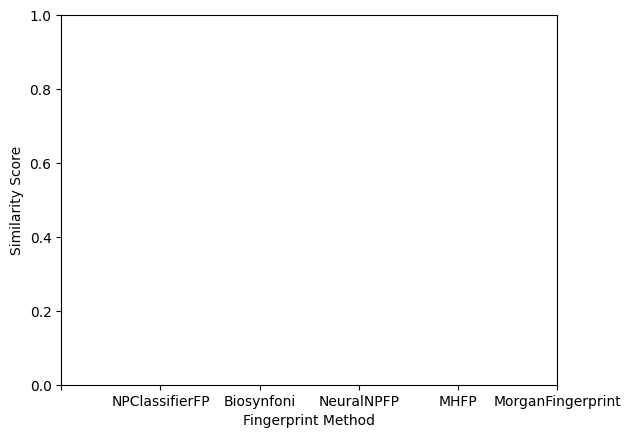

In [1]:
import matplotlib.pyplot as plt
import numpy as np


labels = [
    "",
    "NPClassifierFP",
    "Biosynfoni",
    "NeuralNPFP",
    "MHFP", 
    "MorganFingerprint",
    "NPBERT"
]

fig, ax = plt.subplots()
ax.set_xticklabels(labels=labels, )
ax.set_xlabel("Fingerprint Method")           
ax.set_ylabel("Similarity Score")   

for i in range(0,similarities.shape[0]):
    ax.violinplot(dataset=similarities_sampled[i],positions=[i])
plt.xticks(rotation=45)
plt.title("Distribution of Similarity Scores by Fingerprint")
plt.tight_layout()

plt.savefig("violinplot_similarity.png", dpi=300)
